### Importer les packages

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import pearsonr 

### Importer les données

In [2]:
df = pd.DataFrame(pd.read_csv("data.csv"))

In [3]:
df['categ']=df['categ'].astype('object')

# Analyse de fond

##  Analyse univariée 

In [4]:
 df.describe(include='all') # pour avoir une idée sur les ventes

,id_prod,date,session_id,client_id,sex,birth,price,categ
count,336713,336713,336713,336713,336713,336713.000000,336713.000000,336713.0
unique,3264,336713,169173,8600,2,NaN,NaN,3.0
top,1_369,2021-04-04 16:21:08.083342,s_118668,c_1609,m,NaN,NaN,0.0
freq,1081,1,14,12855,169198,NaN,NaN,209426.0
mean,NaN,NaN,NaN,NaN,NaN,1977.823568,17.215189,NaN
std,NaN,NaN,NaN,NaN,NaN,13.524433,17.855445,NaN
min,NaN,NaN,NaN,NaN,NaN,1929.000000,0.620000,NaN
25%,NaN,NaN,NaN,NaN,NaN,1971.000000,8.610000,NaN
50%,NaN,NaN,NaN,NaN,NaN,1980.000000,13.900000,NaN
75%,NaN,NaN,NaN,NaN,NaN,1987.000000,18.990000,NaN


C:\Users\BOULANGER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-5-cde4996f440c>:4: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("Boîteà moustaches de la variable 'Birth'.jpg",bbox="tight",pad_inches=2,transparent=True)


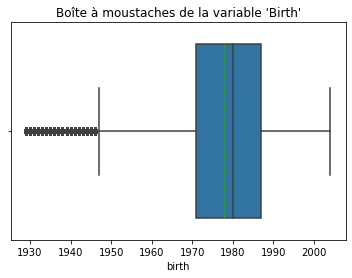

In [5]:
f,axes=plt.subplots()
sns.boxplot(df['birth'],showmeans=True,meanline=True)
plt.title("Boîte à moustaches de la variable 'Birth'")
plt.savefig("Boîteà moustaches de la variable 'Birth'.jpg",bbox="tight",pad_inches=2,transparent=True)

<ipython-input-6-2d8453f92334>:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("Histogramme de la variable 'Birth'jpg",bbox="tight",pad_inches=2,transparent=True)


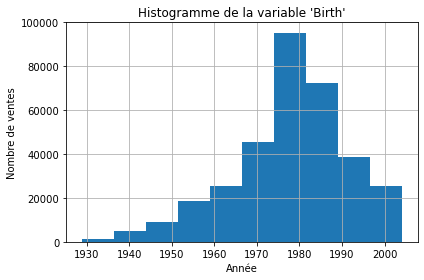

In [6]:
df['birth'].hist() 
plt.title("Histogramme de la variable 'Birth'")
plt.xlabel('Année')
plt.ylabel('Nombre de ventes')
plt.tight_layout()
plt.savefig("Histogramme de la variable 'Birth'jpg",bbox="tight",pad_inches=2,transparent=True)

<ipython-input-7-3e05b932c9cf>:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("Histogramme de la variable 'Price'jpg",bbox="tight",pad_inches=2,transparent=True)


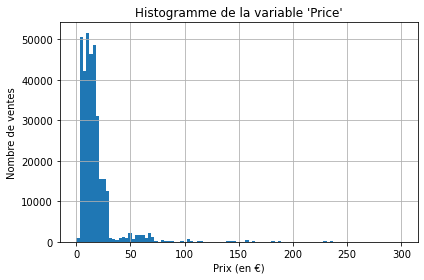

In [7]:
df['price'].hist(range = (0, 300),bins=100)
plt.title("Histogramme de la variable 'Price'")
plt.xlabel('Prix (en €)')
plt.ylabel('Nombre de ventes')
plt.tight_layout()
plt.savefig("Histogramme de la variable 'Price'jpg",bbox="tight",pad_inches=2,transparent=True)

<ipython-input-8-8c054d7d0174>:14: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("Prix moyen du panier par client'jpg",bbox="tight",pad_inches=2,transparent=True)


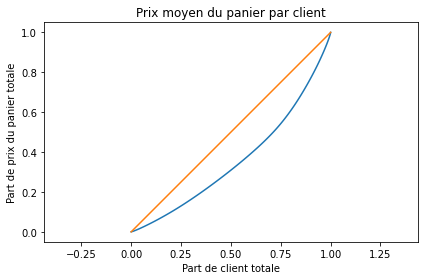

In [8]:
pan=df.groupby(['session_id','client_id'])['price'].sum()
pan_moy=pan.groupby('client_id').mean()
n = len(pan_moy)
lorenz = np.cumsum(np.sort(pan_moy)) / pan_moy.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot(xaxis,xaxis)
plt.title("Prix moyen du panier par client")
plt.xlabel('Part de client totale')
plt.ylabel('Part de prix du panier totale')
plt.tight_layout()
plt.savefig("Prix moyen du panier par client'jpg",bbox="tight",pad_inches=2,transparent=True)

In [9]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
print ("l'indice de gini est:",round(gini,2))

l'indice de gini est: 0.28


In [10]:
df['categ'].value_counts()

0    209426
1    109735
2     17552
Name: categ, dtype: int64

In [11]:
df['sex'].value_counts()

m    169198
f    167515
Name: sex, dtype: int64

ValueError: x must be 1D

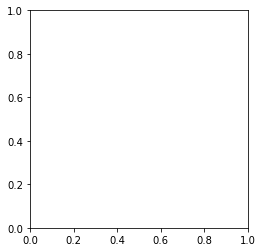

In [12]:
plt.pie([df.categ.value_counts()],labels=df.categ.unique(),autopct="%1.0f%%")
plt.title("La proportion des ventes par catégorie")
plt.tight_layout()
plt.savefig("La proportion des ventes par catégorie.jpg",bbox="tight",pad_inches=2,transparent=True)

C:\Users\BOULANGER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-13-349399bd5679>:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("Histogramme de la variable 'Price'.jpg",bbox="tight",pad_inches=2,transparent=True)


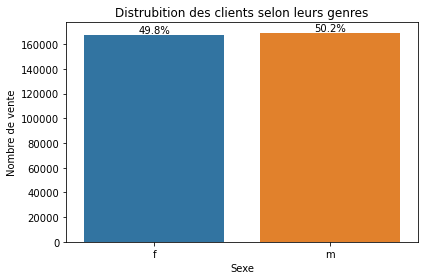

In [13]:
plt.figure(figsize=(6,4))
ax=sns.countplot(df.sex)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/len(df.sex)), (x.mean(), y), 
            ha='center', va='bottom')
plt.title("Distrubition des clients selon leurs genres")
plt.xlabel('Sexe')
plt.ylabel('Nombre de vente')
plt.tight_layout()
plt.savefig("Histogramme de la variable 'Price'.jpg",bbox="tight",pad_inches=2,transparent=True)

In [14]:
df["date"]= pd.to_datetime(df["date"])
df["année"]=df["date"].dt.year
df["mois"]=df["date"].dt.month
df["date_complete"]=df["date"].dt.strftime("%Y-%m")

<ipython-input-15-ccd8a694d80f>:9: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("L'évolution du nombre de ventes au cours du temps.jpg",bbox="tight",pad_inches=2,transparent=True)


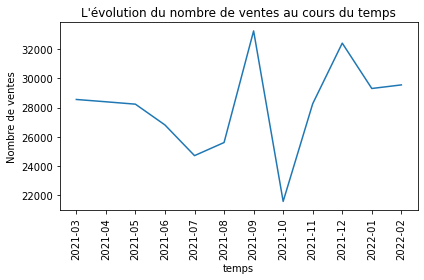

In [15]:
x=df["date_complete"].unique()
y=df["date_complete"].value_counts().sort_index()
plt.plot(x,y)
plt.title("L'évolution du nombre de ventes au cours du temps")
plt.xlabel('temps')
plt.ylabel('Nombre de ventes')
plt.xticks(np.arange(12),('2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08','2021-09', '2021-10', '2021-11', '2021-12', '2022-01', '2022-02'),rotation='vertical')
plt.tight_layout()
plt.savefig("L'évolution du nombre de ventes au cours du temps.jpg",bbox="tight",pad_inches=2,transparent=True)

<ipython-input-16-c83a3021e05b>:9: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("L'évolution du chiffre d'affaires au cours du temps.jpg",bbox="tight",pad_inches=2,transparent=True)


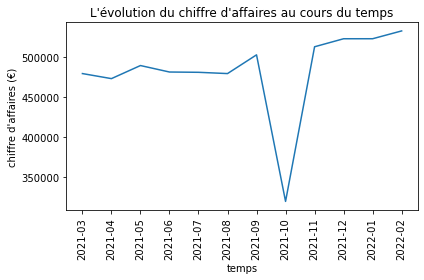

In [16]:
x=df["date_complete"].unique()
z=df.groupby("date_complete")['price'].sum().sort_index()
plt.plot(x,z)
plt.title("L'évolution du chiffre d'affaires au cours du temps")
plt.xlabel('temps')
plt.ylabel("chiffre d'affaires (€)")
plt.xticks(np.arange(12),('2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08','2021-09', '2021-10', '2021-11', '2021-12', '2022-01', '2022-02'),rotation='vertical')
plt.tight_layout()
plt.savefig("L'évolution du chiffre d'affaires au cours du temps.jpg",bbox="tight",pad_inches=2,transparent=True)

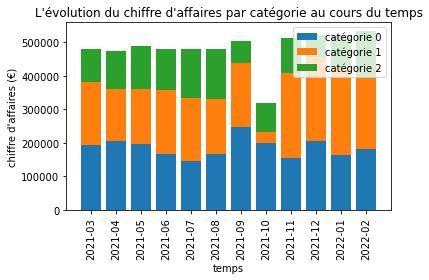

In [17]:
r=df.groupby(['date_complete','categ'])['price'].sum().sort_index()
plt.bar(x,r[:,0],width = 0.8 ,label= "catégorie 0")
plt.bar(x,r[:,1],width = 0.8 ,label= "catégorie 1",bottom=r[:,0])
plt.bar(x,r[:,2],width = 0.8 ,label= "catégorie 2",bottom=r[:,1]+r[:,0])
plt.legend(loc = "upper right" )
plt.title("L'évolution du chiffre d'affaires par catégorie au cours du temps")
plt.xlabel('temps')
plt.ylabel("chiffre d'affaires (€)")
plt.xticks(np.arange(12),('2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08','2021-09', '2021-10', '2021-11', '2021-12', '2022-01', '2022-02'),rotation='vertical')
plt.tight_layout()
plt.savefig("L'évolution du chiffre d'affaires par catégorie au cours du temps.jpg",bbox="tight",pad_inches=2,transparent=True)

## Analyse bivariée

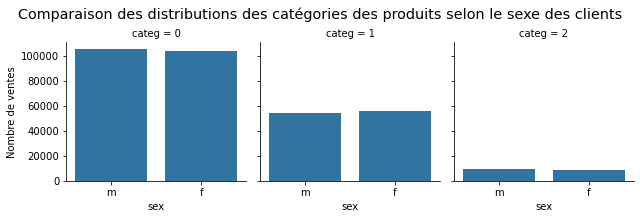

In [18]:
grid=sns.FacetGrid(df,col='categ')
grid.map(sns.countplot,'sex',order = df['sex'].value_counts().index)
plt.suptitle('Comparaison des distributions des catégories des produits selon le sexe des clients', x=0.5, y=1, ha='center', fontsize='x-large')

axes.set_ylim(-0.5,2-0.5)
grid.set_ylabels("Nombre de ventes")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("Comparaison des distributions des catégories des produits selon le sexe des clients.jpg",bbox="tight",pad_inches=2,transparent=True)

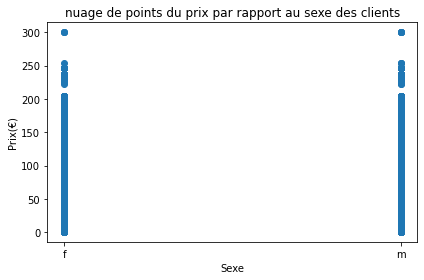

In [19]:
plt.scatter(df['sex'],df['price'])
plt.title("nuage de points du prix par rapport au sexe des clients")
plt.xlabel('Sexe')
plt.ylabel("Prix(€)")
plt.tight_layout()
plt.savefig("nuage de points du prix par rapport au sexe des clients.jpg",bbox="tight",pad_inches=2,transparent=True)

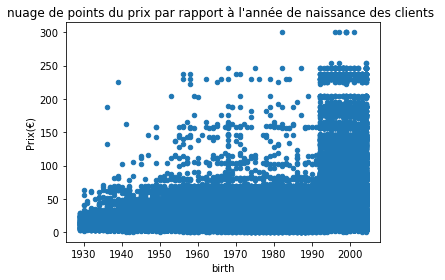

In [20]:
df.plot(kind='scatter',x='birth',y='price')
plt.title("nuage de points du prix par rapport à l'année de naissance des clients ")
plt.ylabel("Prix(€)")
plt.tight_layout()
plt.savefig("nuage de points du prix par rapport à l'année de naissance des clients.jpg",bbox="tight",pad_inches=2,transparent=True)

In [21]:
df['age']=df['année']-df['birth']


In [22]:
def category_ages(age):
    if age<=20:
        return '<20 ans'
    elif (age>20)&(age<=30):
        return '20-30 ans'
    elif (age>30)&(age<=40):
        return '30-40 ans'
    elif (age>40)&(age<=50):
        return '40-50 ans'
    elif (age>50)&(age<=60):
        return '50-60 ans'
    else:
        return '+60 ans'

In [23]:
df['tranch_age']=df['age'].map(category_ages)


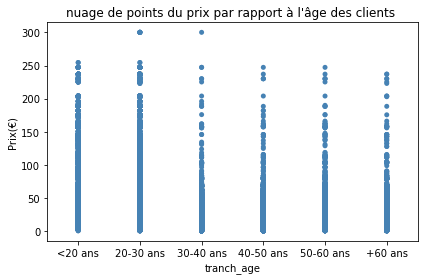

In [24]:
sns.stripplot(data = df,
              x='tranch_age', y='price', 
              order = ['<20 ans','20-30 ans','30-40 ans','40-50 ans','50-60 ans','+60 ans'],
              color = 'steelblue',jitter=False)
plt.title("nuage de points du prix par rapport à l'âge des clients ")
plt.ylabel("Prix(€)")
plt.tight_layout()
plt.savefig("nuage de points du prix par rapport à l'âge des clients.jpg",bbox="tight",pad_inches=2,transparent=True)

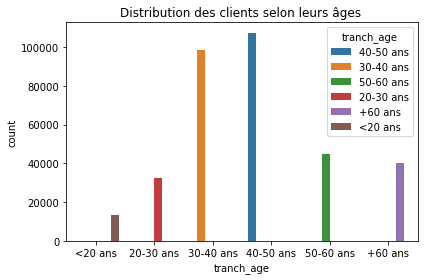

In [25]:
sns.countplot(x='tranch_age',hue='tranch_age',data=df,order=['<20 ans','20-30 ans','30-40 ans','40-50 ans','50-60 ans','+60 ans']) # on compte le nbr d'achats des clients selon leur age 
plt.title('Distribution des clients selon leurs âges ')
plt.tight_layout()
plt.savefig("Distribution des clients selon leurs âges.jpg",bbox="tight",pad_inches=2,transparent=True)

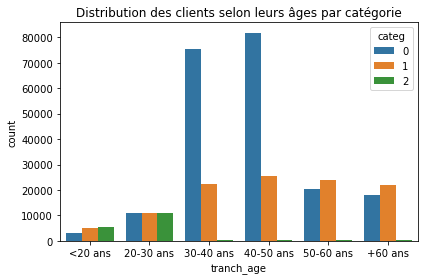

In [26]:
sns.countplot(x='tranch_age',hue='categ',data=df,order=['<20 ans','20-30 ans','30-40 ans','40-50 ans','50-60 ans','+60 ans']) # on compte le nbr d'apparition des clients selon leur age pour les trois catégorie  
plt.title('Distribution des clients selon leurs âges par catégorie')
plt.tight_layout()
plt.savefig("Distribution des clients selon leurs âges par catégorie.jpg",bbox="tight",pad_inches=2,transparent=True)

## Analyse multivariée

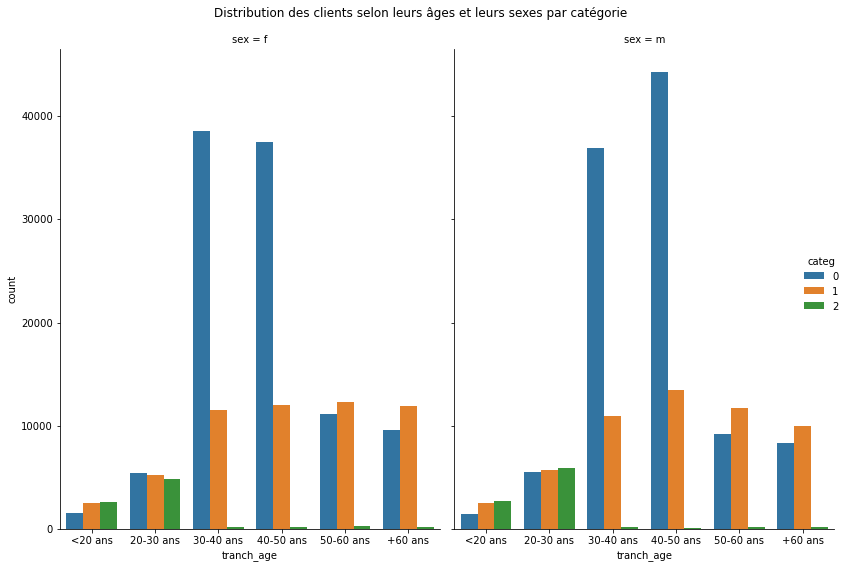

In [27]:
ax=sns.catplot(x="tranch_age", hue="categ", col="sex",
                data=df, kind="count",order=['<20 ans','20-30 ans','30-40 ans','40-50 ans','50-60 ans','+60 ans'],
                height=8, aspect=.7)  
plt.suptitle('Distribution des clients selon leurs âges et leurs sexes par catégorie')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("Distribution des clients selon leurs âges et leurs sexes par catégorie.jpg",bbox="tight",pad_inches=2,transparent=True)

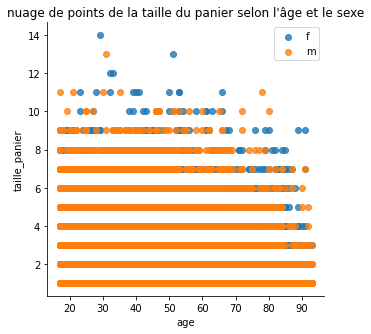

In [37]:
df_panier=df.groupby(['session_id',"age",'client_id',"sex"])['id_prod'].count().reset_index()
df_panier.rename(columns={'id_prod':'taille_panier'}, inplace=True)
sns.lmplot( x="age", y='taille_panier', data=df_panier, fit_reg=False, hue='sex', legend=False)
plt.legend(loc='upper right')
plt.title("nuage de points de la taille du panier selon l'âge et le sexe")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("nuage de points de la taille du panier selon l'âge et le sexe.jpg",bbox="tight",pad_inches=2,transparent=True)

### La corrélation entre le sexe des clients et les catégories de produits achetés

In [29]:
X = "categ"
Y = "sex"
cont = df[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

sex,f,m,Total
categ,,,
0,103786,105640,209426
1,55469,54266,109735
2,8260,9292,17552
Total,167515,169198,336713


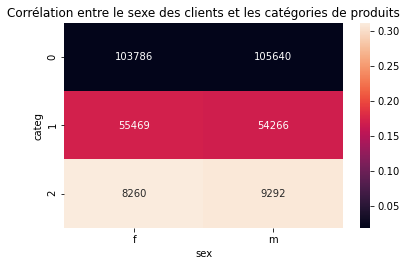

In [30]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(df)
indep = tx.dot(ty) / n
c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1],fmt='d')
plt.title("Corrélation entre le sexe des clients et les catégories de produits")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("Corrélation entre le sexe des clients et les catégories de produits.jpg",bbox="tight",pad_inches=2,transparent=True)


### La corrélation entre l'âge des clients et le montant total des achats

In [31]:
K=df.groupby(["age"])['price'].sum().reset_index()
corr,_=pearsonr(K['age'],K['price'])
print ('Pearsons correlation:%.3f'% corr)

Pearsons correlation:-0.821


### La corrélation entre l'âge des clients et la fréquence d’achat

In [32]:
L=df.groupby(['mois',"age"])['date_complete'].count().reset_index()
corr,_=pearsonr(L['age'],L['date_complete'])
print ('Pearsons correlation:%.3f'% corr)

Pearsons correlation:-0.519


### La corrélation entre l'âge des clients et la taille du panier moyen

In [33]:
S=df_panier.groupby(['age'])['taille_panier'].mean().reset_index()# on calcule la moy par rapport l'age des clients (le panier moyen)
corr,_=pearsonr(S['age'],S['taille_panier'])
print ('Pearsons correlation:%.3f'% corr)

Pearsons correlation:-0.589


### La corrélation entre l'âge des clients et la catégorie des produits achetés

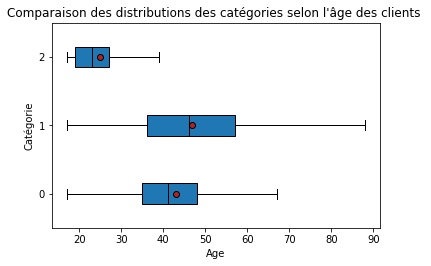

In [39]:
X = "categ" # qualitative
Y = "age" # quantitative
sous_echantillon = df[df["age"]>=17].copy()
modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])
# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title("Comparaison des distributions des catégories selon l'âge des clients ")
plt.xlabel('Age')
plt.ylabel("Catégorie")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("Comparaison des distributions des catégories selon l'âge des clients.jpg",bbox="tight",pad_inches=2,transparent=True)



In [35]:
X = df["categ"] # qualitative
Y=df['age']# quantitative
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT   
eta_squared(X,Y)
print('eta_squared:',round(eta_squared(X,Y),2))

eta_squared: 0.12
